In [1]:
%matplotlib inline

In [2]:
from braket.circuits import Circuit
from braket.devices import LocalSimulator

In [3]:
from plot_braket_circuit import *

In [4]:
device = LocalSimulator()

In [5]:
def FullAdderCircuit(carry_in, number_1, number_2, sum_output, carry_out):
    full_adder = Circuit()
    full_adder.cnot(carry_in,sum_output)
    full_adder.cnot(number_1,sum_output)
    full_adder.cnot(number_2,sum_output)
    full_adder.ccnot(carry_in,number_1,carry_out)
    full_adder.ccnot(carry_in,number_2,carry_out)
    full_adder.ccnot(number_1,number_2,carry_out)
    return full_adder
    

In [6]:
full_adder = FullAdderCircuit(0,1,2,3,4)

In [7]:
print(full_adder)

T  : |0|1| 2 |3|4|
                  
q0 : -C-----C-C---
      |     | |   
q1 : -|-C---C-|-C-
      | |   | | | 
q2 : -|-|-C-|-C-C-
      | | | | | | 
q3 : -X-X-X-|-|-|-
            | | | 
q4 : -------X-X-X-

T  : |0|1| 2 |3|4|


In [8]:
full_adder_2 = FullAdderCircuit(4,5,6,7,8)

In [9]:
print(full_adder_2)

T  : |0|1| 2 |3|4|
                  
q4 : -C-----C-C---
      |     | |   
q5 : -|-C---C-|-C-
      | |   | | | 
q6 : -|-|-C-|-C-C-
      | | | | | | 
q7 : -X-X-X-|-|-|-
            | | | 
q8 : -------X-X-X-

T  : |0|1| 2 |3|4|


In [10]:
two_digit_adder = full_adder + full_adder_2

In [11]:
print(two_digit_adder)

T  : |0|1| 2 |3|4|5|6| 7 |8|9|
                              
q0 : -C-----C-C---------------
      |     | |               
q1 : -|-C---C-|-C-------------
      | |   | | |             
q2 : -|-|-C-|-C-C-------------
      | | | | | |             
q3 : -X-X-X-|-|-|-------------
            | | |             
q4 : -------X-X-X-C-----C-C---
                  |     | |   
q5 : -------------|-C---C-|-C-
                  | |   | | | 
q6 : -------------|-|-C-|-C-C-
                  | | | | | | 
q7 : -------------X-X-X-|-|-|-
                        | | | 
q8 : -------------------X-X-X-

T  : |0|1| 2 |3|4|5|6| 7 |8|9|


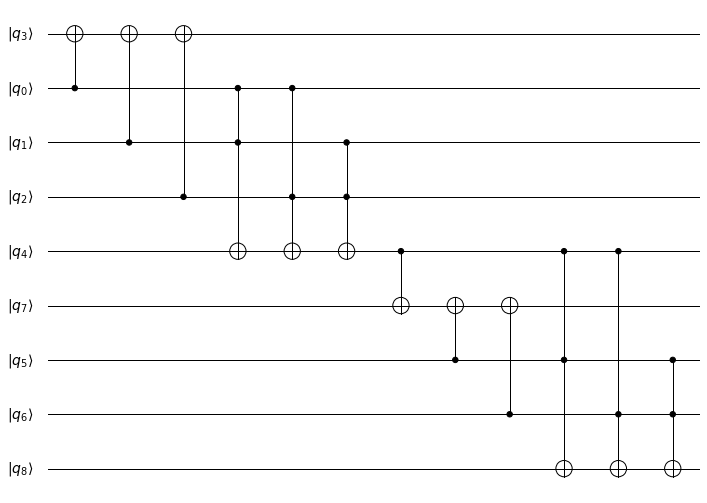

In [12]:
plot_braket_circuit(two_digit_adder)

In [13]:
def generate_input(input_list):
    
    result_list = list()
    
    for input_index, digit_string in enumerate(input_list):
        cur_circuit = Circuit()
        for reg_index, digit_value in enumerate(digit_string):
            if (digit_value == '0'):
                cur_circuit.i(reg_index)
            elif (digit_value == '1'):
                cur_circuit.x(reg_index)
            else:
                raise Exception('incorrect input value: \'' + digit_value + '\' in: ' + digit_string )
        
        result_list.append(cur_circuit)
        
    return result_list

In [14]:
input_list = ['000101', '00001111', '0001010']

In [15]:
result_list = generate_input(input_list)

In [16]:
# for each_circuit in result_list:
#     print (each_circuit)

In [17]:
input_h = Circuit().i(0).h(1).h(2).i(3).i(4).h(5).h(6).i(7).i(8)

In [18]:
full_circuit = input_h + two_digit_adder

In [19]:
print (full_circuit)

T  : |0|1|2| 3 |4|5|6|7| 8 |9|10|
                                 
q0 : -I-C-----C-C----------------
        |     | |                
q1 : -H-|-C---C-|-C--------------
        | |   | | |              
q2 : -H-|-|-C-|-C-C--------------
        | | | | | |              
q3 : -I-X-X-X-|-|-|--------------
              | | |              
q4 : -I-------X-X-X-C-----C-C----
                    |     | |    
q5 : -H-------------|-C---C-|-C--
                    | |   | | |  
q6 : -H-------------|-|-C-|-C-C--
                    | | | | | |  
q7 : -I-------------X-X-X-|-|-|--
                          | | |  
q8 : -I-------------------X-X-X--

T  : |0|1|2| 3 |4|5|6|7| 8 |9|10|


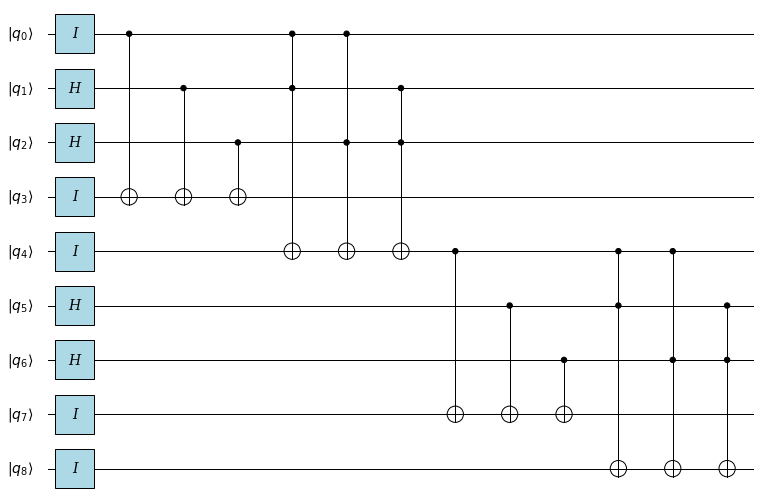

In [20]:
plot_braket_circuit(full_circuit)

In [21]:
task = device.run(full_circuit, shots=100000)
result = task.result()

print (result.measurement_counts)

Counter({'011011111': 6412, '000000110': 6363, '011011001': 6361, '000001010': 6358, '011010101': 6330, '010101101': 6316, '000000000': 6283, '001100000': 6280, '010100000': 6254, '000001101': 6252, '001101010': 6184, '001101101': 6179, '010101010': 6166, '010100110': 6098, '011010010': 6084, '001100110': 6080})


In [22]:
measurement_counts = result.measurement_counts

In [23]:
key_list = list(measurement_counts.keys())

In [24]:
key_list.sort()

In [25]:
key_list

['000000000',
 '000000110',
 '000001010',
 '000001101',
 '001100000',
 '001100110',
 '001101010',
 '001101101',
 '010100000',
 '010100110',
 '010101010',
 '010101101',
 '011010010',
 '011010101',
 '011011001',
 '011011111']

In [26]:
keys = result.measurement_counts.keys()
measure_result = dict()
for each_key in keys:
    new_key = each_key[8] + each_key[7] + each_key[3] 
    result.measurement_counts['each_key']
    if (new_key in measure_result.keys()):
        measure_result[new_key] = measure_result[new_key] + result.measurement_counts[each_key]/100000
    else:
        measure_result[new_key] = result.measurement_counts[each_key]/100000

In [27]:
measure_result

{'101': 0.12494999999999999,
 '011': 0.24528,
 '000': 0.06283,
 '010': 0.18805,
 '001': 0.12534,
 '110': 0.06412,
 '100': 0.18943}

In [28]:
full_circuit.to_ir()

Program(braketSchemaHeader=BraketSchemaHeader(name='braket.ir.jaqcd.program', version='1'), results=[], basis_rotation_instructions=[], instructions=[I(type=<Type.i: 'i'>, target=0), H(type=<Type.h: 'h'>, target=1), H(type=<Type.h: 'h'>, target=2), I(type=<Type.i: 'i'>, target=3), I(type=<Type.i: 'i'>, target=4), H(type=<Type.h: 'h'>, target=5), H(type=<Type.h: 'h'>, target=6), I(type=<Type.i: 'i'>, target=7), I(type=<Type.i: 'i'>, target=8), CNot(type=<Type.cnot: 'cnot'>, control=0, target=3), CNot(type=<Type.cnot: 'cnot'>, control=1, target=3), CNot(type=<Type.cnot: 'cnot'>, control=2, target=3), CCNot(type=<Type.ccnot: 'ccnot'>, controls=[0, 1], target=4), CCNot(type=<Type.ccnot: 'ccnot'>, controls=[0, 2], target=4), CCNot(type=<Type.ccnot: 'ccnot'>, controls=[1, 2], target=4), CNot(type=<Type.cnot: 'cnot'>, control=4, target=7), CNot(type=<Type.cnot: 'cnot'>, control=5, target=7), CNot(type=<Type.cnot: 'cnot'>, control=6, target=7), CCNot(type=<Type.ccnot: 'ccnot'>, controls=[4, 5]

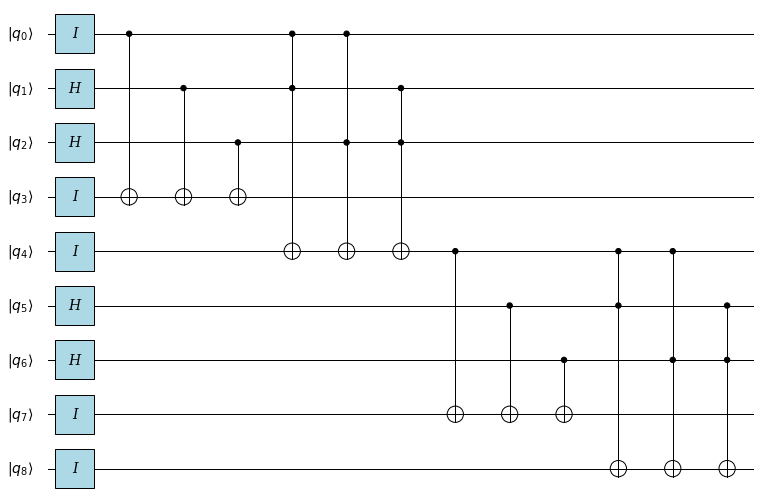

In [29]:
plot_braket_circuit(full_circuit, schedule=True)